# Gapminder
Inspired by https://www.gapminder.org/tools/

GAPMINDER POPULATION

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

GAPMINDER LIFE EXPECTANCY

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

GAPMINDER INCOME

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

GAPMINDER COUNTRY

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

[########################################] | 100% Completed | 39.6s



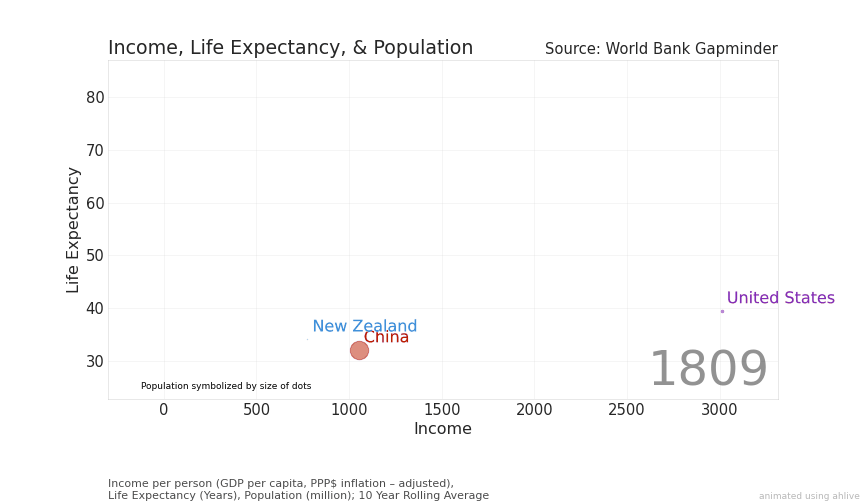

In [2]:
import pandas as pd
import ahlive as ah

# open and combine dataframes
pop_df = ah.tutorial.open_dataset('gapminder_population')
lex_df = ah.tutorial.open_dataset('gapminder_life_expectancy')
inc_df = ah.tutorial.open_dataset('gapminder_income')
cnt_df = ah.tutorial.open_dataset('gapminder_country')
df = pop_df.merge(lex_df, on=['geo', 'time']).merge(inc_df, on=['geo', 'time'])
df = df.set_index('geo').join(cnt_df.set_index('country')[['name', 'region']])

# subset and preprocess
countries = ['United States', 'China', 'New Zealand']
df = df.loc[df['name'].isin(countries)]
df = df.loc[df['time'] <= 2020]
df['population'] = df['population'] / 1e6

# apply 10 year rolling mean to lessen bouncing
numeric_cols = ['population', 'life_expectancy', 'income']
df[numeric_cols] = df.groupby('name')[
    numeric_cols
].rolling(10).mean().reset_index(level=0)[numeric_cols]
df = df.dropna()

# animate
caption = (
    'Income per person (GDP per capita, PPP$ inflation – adjusted),\n'
    'Life Expectancy (Years), Population (million); 10 Year Rolling Average')
ah_df = ah.DataFrame(
    df,
    xs='income',
    ys='life_expectancy',
    s='population',
    alpha=0.5,
    label='name',
    preset='trail',
    inline_labels='name',
    state_labels='time',
    title='Income, Life Expectancy, & Population',
    subtitle='Source: World Bank Gapminder',
    note='Population symbolized by size of dots',
    caption=caption,
    figsize=(12, 7),
    legend=False,
    revert='boomerang',
    xlim0s=0,
    xlim1s='explore',
    xmargins=0.1,
    ymargins=0.1,
    scheduler='processes',
    workers=4
).remark(
    remarks='s',
    state_labels=range(1820, 2020, 20),
    durations=2,
    persist_plot=True
).config(
    'remark_inline',
    suffix='M people'
).config(
    'durations',
    transition_frames=0.1
).config(
    'preset',
    chart="line",
    expire=99999
)
ah_df.render()